# 기술 통계

In [1]:
import numpy as np
import pandas as pd

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3
# DataFrame의 출력을 소수점 이하 3자리로 제한 
pd.set_option('precision', 3)

## 데이터

### 데이터 읽어오기

In [2]:
# 학생번호를 인덱스로 csv 파일을 읽어들여, 변수 df에 저장
df = pd.read_csv('./data/sport_test.csv', index_col='학생번호')
# 변수 df를 출력
df

,학년,악력,윗몸일으키기,점수,순위
학생번호,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2
6,2,36.5,20,9,9
7,3,36.6,31,13,6
8,3,49.2,37,18,1
9,3,26.0,28,10,8


### 특정 열 추출

In [3]:
#Series 로 리턴
df['악력']

학생번호
1     40.2
2     34.2
3     28.8
4     39.0
5     50.9
6     36.5
7     36.6
8     49.2
9     26.0
10    47.4
Name: 악력, dtype: float64

In [4]:
#DataFrame 으로 리턴
df[['악력']]

,악력
학생번호,
1,40.2
2,34.2
3,28.8
4,39.0
5,50.9
6,36.5
7,36.6
8,49.2
9,26.0


In [5]:
print(type(df['악력']))
print(type(df[['악력']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


### 데이터의 크기 확인

In [6]:
df.shape

(10, 5)

## 변수의 종류

### 데이터 읽어오기

In [7]:
#데이터 읽어오기
university = pd.read_csv("./data/descriptive.csv", encoding='ms949')
print('------데이터 읽기 ------')
print(university.head())
print('------데이터 특성 확인 ------')
print(university.shape)
print('------데이터 특성 확인 ------')
print(university.describe())

------데이터 읽기 ------
   resident  gender  age  level  cost  type  survey  pass
0       1.0       1   50    1.0   5.1   1.0     1.0   2.0
1       2.0       1   54    2.0   4.2   1.0     2.0   2.0
2       NaN       1   62    2.0   4.7   1.0     1.0   1.0
3       4.0       2   50    NaN   3.5   1.0     4.0   1.0
4       5.0       1   51    1.0   5.0   1.0     3.0   1.0
------데이터 특성 확인 ------
(300, 8)
------데이터 특성 확인 ------
       resident   gender      age    level     cost     type   survey     pass
count   279.000  300.000  300.000  287.000  271.000  274.000  187.000  279.000
mean      2.233    1.420   53.880    1.836    8.723    1.281    2.594    1.434
std       1.484    0.546    6.813    0.792   68.971    0.474    0.976    0.496
min       1.000    0.000   40.000    1.000 -457.200    1.000    1.000    1.000
25%       1.000    1.000   48.000    1.000    4.400    1.000    2.000    1.000
50%       2.000    1.000   53.000    2.000    5.400    1.000    3.000    1.000
75%       3.000    2.000

### 명목 척도

In [8]:
print('--의미없는 요약 통계량--')
print(university['gender'].describe())

print('--구성 비율--')
print(university['gender'].value_counts())

--의미없는 요약 통계량--
count    300.000
mean       1.420
std        0.546
min        0.000
25%        1.000
50%        1.000
75%        2.000
max        5.000
Name: gender, dtype: float64
--구성 비율--
1    173
2    124
0      2
5      1
Name: gender, dtype: int64


1    173
2    124
Name: gender, dtype: int64


<AxesSubplot:>

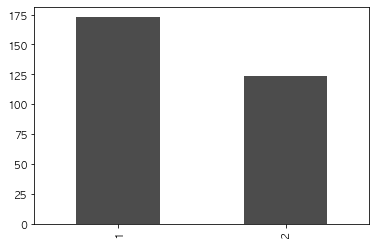

In [9]:
#데이터 정제
university_gender = university[(university['gender'] == 1) | (university['gender'] ==2)]
print(university_gender['gender'].value_counts())
#범주형 데이터 시각화
university_gender['gender'].value_counts().plot.bar(color='k', alpha=0.7)

### 순서 척도

1.0    115
2.0     99
3.0     70
Name: level, dtype: int64


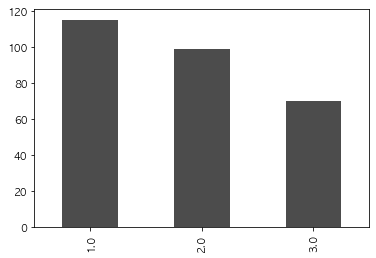

In [10]:
#순서 척도 시각화
print(university_gender['level'].value_counts())

plt.figure()
university_gender['level'].value_counts().plot.bar(color='k', alpha=0.7)
plt.show()

### 등간 척도

count    185.000
mean       2.589
std        0.980
min        1.000
25%        2.000
50%        2.000
75%        3.000
max        5.000
Name: survey, dtype: float64


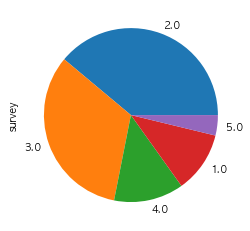

In [11]:
plt.figure()
print(university_gender['survey'].describe())
#등간 척도 데이터 시각화
university_gender['survey'].value_counts().plot.pie()
plt.show()

### 비율 척도

 5.0      18
 6.3      16
 4.0      15
 6.0      14
 6.2      13
 6.4      11
 5.1      10
 5.2       9
 4.1       9
 6.1       8
 6.7       8
 5.5       8
 5.3       7
 5.7       6
 4.7       6
 3.0       6
 5.8       5
 4.3       5
 5.4       5
 3.5       5
 4.6       5
 6.8       4
 5.6       4
 4.4       4
 6.9       4
 6.5       4
 7.7       4
 4.9       4
 3.9       3
 7.0       3
 4.2       3
 3.8       3
 7.1       3
-235.8     2
 336.5     2
 2.3       2
 7.2       2
 7.9       2
 75.1      2
 115.7     2
 5.9       2
 85.1      2
 3.4       2
-5.9       2
 4.8       2
 3.3       2
-4.8       1
-345.6     1
 675.0     1
 225.8     1
-457.2     1
 1.0       1
-75.0      1
 2.1       1
 257.8     1
 4.5       1
Name: cost, dtype: int64


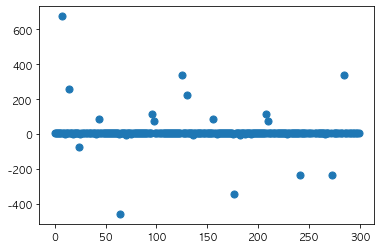

In [12]:
plt.figure()
print(university_gender['cost'].value_counts())
plt.scatter(university_gender.index, university_gender['cost'], s=50)
plt.show()

In [13]:
#범주화
cost = university_gender['cost']
print(cost[(cost>=2)&(cost<=10)].describe())
print(cost[(cost>=2)&(cost<=10)].value_counts())

count    248.000
mean       5.354
std        1.139
min        2.100
25%        4.600
50%        5.400
75%        6.200
max        7.900
Name: cost, dtype: float64
5.0    18
6.3    16
4.0    15
6.0    14
6.2    13
6.4    11
5.1    10
4.1     9
5.2     9
5.5     8
6.1     8
6.7     8
5.3     7
3.0     6
5.7     6
4.7     6
4.6     5
4.3     5
5.8     5
5.4     5
3.5     5
5.6     4
6.9     4
4.9     4
6.5     4
4.4     4
6.8     4
7.7     4
3.8     3
3.9     3
7.0     3
4.2     3
7.1     3
3.4     2
3.3     2
7.2     2
5.9     2
4.8     2
2.3     2
7.9     2
2.1     1
4.5     1
Name: cost, dtype: int64


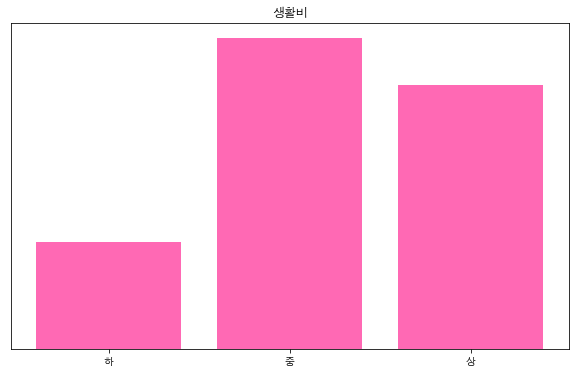

In [14]:
plt.figure(figsize=(10, 6))

## histogram의 경우 내가 값 리스트를 넣고, 입력한 bin 개수에 따라 알아서 분류해줌 
## ys: y값, 
## xs: x 값
ys, xs, patches = plt.hist(cost[(cost>=2)&(cost<=10)], 
         bins=3, ## 몇 개의 바구니로 구분할 것인가. 
         density=True, ## ytick을 퍼센트비율로 표현해줌 
         cumulative=False, ## 누적으로 표현하고 싶을 때는 True
         histtype='bar',  ## 타입. or step으로 하면 모양이 바뀜.  
         orientation='vertical', ## or horizontal
         rwidth=0.8, ## 1.0일 경우, 꽉 채움 작아질수록 간격이 생김
         color='hotpink', ## bar 색깔
        )

plt.yticks([])## text로 표시하고 있기 때문에 이 부분은 삭제해줌 
## xticks을 변경해줌 
plt.xticks([(xs[i]+xs[i+1])/2 for i in range(0, len(xs)-1)], 
           ["하", "중", "상"])
plt.title('생활비')
plt.show()

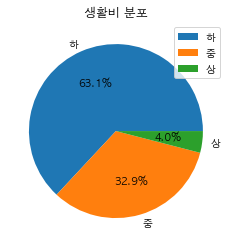

In [15]:
plt.figure()

cost = cost[(cost>=1)&(cost<=10)]
cost[(cost>=1)&(cost<=3)] = 1
cost[(cost>3)&(cost<=6)] = 2
cost[(cost>6)] = 3

cost = cost.astype(int)

label = ["하", "중", "상"]

plt.pie(cost.value_counts(), labels=label, autopct='%1.1f%%')
plt.title('생활비 분포')
plt.legend()
plt.show()

## 데이터의 특성

### 대표값

In [16]:
#기하평균 과 조화평균
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import math
s = Series([10, 11, 10.78])
print("평균 성장률?:", s.pct_change().mean())
print("평균 성장률(기하평균):", math.sqrt((11/10)*(10.78/11)))

print("평균 속도?:" , (100+60) / 2)
print("평균 속도(조화평균):" , 2*100*60 / (100+60))

평균 성장률?: 0.040000000000000036
평균 성장률(기하평균): 1.0382677881933928
평균 속도?: 80.0
평균 속도(조화평균): 75.0


In [17]:
from scipy import stats
tdata = pd.read_csv('./data/tdata.csv', encoding='cp949')
print('평균:', tdata['성적'].mean())
print('중간값:', tdata['성적'].median())
#상위와 하위 10% 잘라내고 평균 구하기
print('절사평균:', stats.trim_mean(tdata['성적'], 0.1))

평균: 77.1
중간값: 77.5
절사평균: 77.0


In [18]:
from scipy import stats
state = pd.read_csv("./data/state.csv")
print("평균:", state['Population'].mean())
print("절사 평균:", stats.trim_mean(state['Population'], 0.1))
print("중간값:", state['Population'].median())

평균: 6162876.3
절사 평균: 4783697.125
중간값: 4436369.5


In [19]:
#가중 평균이나 가중 중앙값 구하기
#wquantiles 패키지 설치
import wquantiles
#가중 평균을 구하기 위해서는 numpy 의 average 함수를 이용
print(state['Murder.Rate'].mean())
print(np.average(state['Murder.Rate'], weights=state['Population']))
#가중 중앙값은 wquantiles 패키지의 median을 이용 - 설치 해야 함
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.066
4.445833981123393
4.4


In [20]:
#최빈값
print(pd.Series([1, 2, 3, 4, 5]).mode())
print(state['Murder.Rate'].mode())

0    1
1    2
2    3
3    4
4    5
dtype: int64
0    1.6
1    2.0
2    5.7
dtype: float64


### 데이터의 분포 탐색

In [21]:
print(state.head(8))
#표준 편차
print(state['Population'].std())
#IQR - 사분위 범위
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))
#중위 절대 편차(MAD)
from statsmodels import robust
print(robust.scale.mad(state['Population']))
print(abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817)

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE
6848235.347401142
4847308.0
3849876.1459979336
3849876.1459979336


In [22]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [23]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


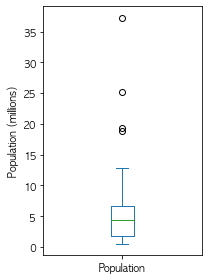

In [24]:
#인구에 대한 상자 그림
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')
plt.tight_layout()
plt.show()

In [25]:
#도수분포표

#10개의 구간으로 분할
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


In [26]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

In [27]:
#데이터 가져오기
scores = pd.read_csv('./data/scores_em.csv',
                 index_col='student number')
# df의 처음 5행을 표시
print(scores.head())

# 50명의 영어 점수 array
english_scores = np.array(scores['english'])

freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
print(freq)

# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
print(freq_dist_df)

                english  mathematics
student number                      
1                    42           65
2                    69           80
3                    56           63
4                    41           63
5                    57           76
[ 0  0  0  2  8 16 18  6  0  0]
        frequency
class            
0~10            0
10~20           0
20~30           0
30~40           2
40~50           8
50~60          16
60~70          18
70~80           6
80~90           0
90~100          0


In [28]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
print("계급값:", class_value)

rel_freq = freq / freq.sum()
print("상대도수:", rel_freq)

cum_rel_freq = np.cumsum(rel_freq)
print("누적 상대 도수:", cum_rel_freq)

#계급값과 상대 도수 와 누적 상대 도수를 도수분표포에 추가
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

print(freq_dist_df)

print("빈도가 가장 많은 계급:", freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value'])

계급값: [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
상대도수: [0.   0.   0.   0.04 0.16 0.32 0.36 0.12 0.   0.  ]
누적 상대 도수: [0.   0.   0.   0.04 0.2  0.52 0.88 1.   1.   1.  ]
        class value  frequency  relative frequency  \
class                                                
0~10              5          0                0.00   
10~20            15          0                0.00   
20~30            25          0                0.00   
30~40            35          2                0.04   
40~50            45          8                0.16   
50~60            55         16                0.32   
60~70            65         18                0.36   
70~80            75          6                0.12   
80~90            85          0                0.00   
90~100           95          0                0.00   

        cumulative relative frequency  
class                                  
0~10                             0.00  
10~20                            0.00  
20~30                     

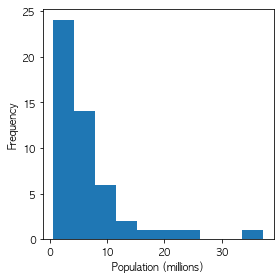

In [29]:
#히스토그램
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

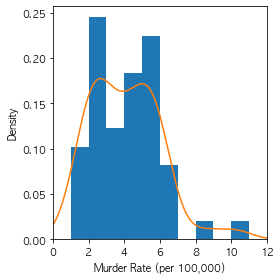

In [30]:
#밀도 추정
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

# 멕시코 풍 프랜차즈 chipotle 주문 데이터의 탐색적 분석

## [Chipotle 데이터셋의 기본 정보]

### 데이터 가져오기

In [31]:
import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
file_path = './data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')
print(chipo.shape)
print("------------------------------------")
chipo.info()

(4622, 5)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Chipotle 데이터셋의 행과 열, 데이터

In [32]:
# chipo 라는 Dataframe에서 순서대로 10개의 row 데이터를 보여줍니다.
print(chipo.head(10))
print("------------------------------------")
print(chipo.columns)
print("------------------------------------")
print(chipo.index)

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

### Chipotle 데이터셋의 수치적 특징 파악

In [33]:
# order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환
chipo['order_id'] = chipo['order_id'].astype(str)

# chipo dataframe에서 수치형 피처들의 요약 통계량을 확인
print(chipo.describe())

       quantity
count  4622.000
mean      1.076
std       0.410
min       1.000
25%       1.000
50%       1.000
75%       1.000
max      15.000


In [34]:
# order_id의 개수를 출력
print(len(chipo['order_id'].unique()))
# item_name의 개수를 출력
print(len(chipo['item_name'].unique()))

1834
50


## 탐색과 시각화

### 가장 많이 주문한 아이템 TOP 10

In [35]:
# 가장 많이 주문한 item : top 10을 출력합니다.
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


### 아이템별 주문 개수와 총량

In [36]:
# item당 주문 개수를 출력합니다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] # item당 주문 개수를 출력합니다.

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [37]:
# item당 주문 총량을 출력합니다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # item당 주문 총량을 출력합니다.

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

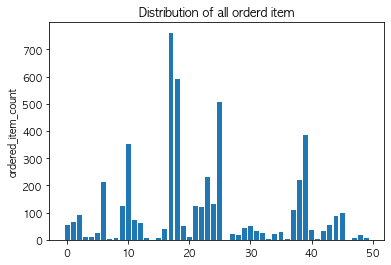

In [38]:
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()
 
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')
 
plt.show()

## 데이터 전처리

In [39]:
print(chipo.info())
print('-------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [40]:
# column 단위 데이터에 apply 함수로 전처리를 적용
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000,4622.000
mean,1.076,7.464
std,0.410,4.246
min,1.000,1.090
25%,1.000,3.390
50%,1.000,8.750
75%,1.000,9.250
max,15.000,44.250


In [41]:
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

## 개념적 탐색 분석

### 주문당 평균 금액 출력

In [42]:
# 주문당 평균 계산금액을 출력합니다.
chipo.groupby('order_id')['item_price'].sum().mean()

18.811

In [43]:
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000
mean       18.811
std        11.653
min        10.080
25%        12.572
50%        16.200
75%        21.960
max       205.250
Name: item_price, dtype: float64

### 한 주문에 10달러 이상 지불한 주문 번호(id) 출력

In [44]:
# 한 주문에 10달러 이상 사용한 id를 출력합니다.
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


### 각 아이템의 가격 구하기

In [45]:
# 각 아이템의 가격을 계산합니다.
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


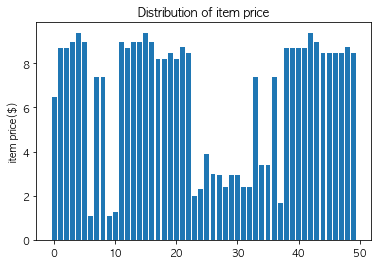

In [46]:
# 아이템 가격 분포 그래프를 출력합니다.
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
 
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
 
plt.show()

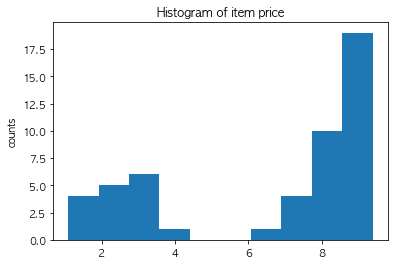

In [47]:
# 아이템 가격 히스토그램을 출력합니다.
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

### 가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기

In [48]:
# 가장 비싼 주문에서 item이 총 몇개 팔렸는지를 계산합니다.
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


### Veggie Salad Bowl이 몇 번 주문되었는지 구하기

In [49]:
# “Veggie Salad Bowl”이 몇 번 주문되었는지를 계산합니다.
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id']) # 한 주문 내에서 중복 집계된 item_name을 제거합니다.

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### “Chicken Bowl”을 2개 이상 주문한 주문 횟수를 구하기

In [50]:
# “Chicken Bowl”을 2개 이상 주문한 주문 횟수를 구합니다.
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(chipo_chicken_result.shape[0])

33


### “Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량을 구하기

In [51]:
# “Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량을 구합니다.
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

## 다변량 탐색

### 교차 분석

In [52]:
#university = pd.read_csv("data/descriptive.csv", encoding='ms949')
print(university.columns)

university.drop("cost", axis=1, inplace=True)
university['성별'] = '남자'
idx = 0
for val in university['gender']:
    if val == 2:
        university['성별'][idx] = '여자'
    idx = idx + 1
university.drop("gender", axis=1, inplace=True)

print(university.head())

Index(['resident', 'gender', 'age', 'level', 'cost', 'type', 'survey', 'pass'], dtype='object')
   resident  age  level  type  survey  pass  성별
0       1.0   50    1.0   1.0     1.0   2.0  남자
1       2.0   54    2.0   1.0     2.0   2.0  남자
2       NaN   62    2.0   1.0     1.0   1.0  남자
3       4.0   50    NaN   1.0     4.0   1.0  여자
4       5.0   51    1.0   1.0     3.0   1.0  남자


/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_19998/3953191355.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['성별'][idx] = '여자'


In [53]:
university['학력'] = '응답없음'
idx = 0
for val in university['level']:
    if val == 1.0:
        university['학력'][idx] = '고졸'
    if val == 2.0:
        university['학력'][idx] = '대졸'
    if val == 3.0:
        university['학력'][idx] = '대학원졸'
    idx = idx + 1
university.drop("level", axis=1, inplace=True)

university['합격여부'] = '응답없음'
idx = 0
for val in university['pass']:
    if val == 1.0:
        university['합격여부'][idx] = '합격'
    if val == 2.:
        university['합격여부'][idx] = '불합격'
    idx = idx + 1
university.drop("pass", axis=1, inplace=True)

university['거주지'] = '응답없음'
idx = 0
for val in university['resident']:
    if val == 1.0:
        university['거주지'][idx] = '특별시'
    if val == 2.0:
        university['거주지'][idx] = '광역시'
    if val == 3.0:
        university['거주지'][idx] = '시군'
    idx = idx + 1
university.drop("resident", axis=1, inplace=True)

print(university.head())

/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_19998/4092203582.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['학력'][idx] = '고졸'
/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_19998/4092203582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['학력'][idx] = '대졸'
/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_19998/4092203582.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

   age  type  survey  성별    학력 합격여부   거주지
0   50   1.0     1.0  남자    고졸  불합격   특별시
1   54   1.0     2.0  남자    대졸  불합격   광역시
2   62   1.0     1.0  남자    대졸   합격  응답없음
3   50   1.0     4.0  여자  응답없음   합격  응답없음
4   51   1.0     3.0  남자    고졸   합격  응답없음


/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_19998/4092203582.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['거주지'][idx] = '광역시'
/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_19998/4092203582.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['거주지'][idx] = '시군'


In [54]:
university = university[(university["학력"]=='고졸') | (university["학력"]=='대졸') | (university["학력"]=='대학원졸') ]
university = university[(university["합격여부"]=='합격') | (university["합격여부"]=='불합격')]
print(pd.crosstab(university['학력'], university['합격여부']))

합격여부  불합격  합격
학력           
고졸     49  60
대졸     35  58
대학원졸   31  36


## 두 데이터 사이의 관계를 나타내는 지표

In [55]:
# 데이터 읽어오기
mpg = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름을 설정
mpg.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 
print(mpg.head(5)) 

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


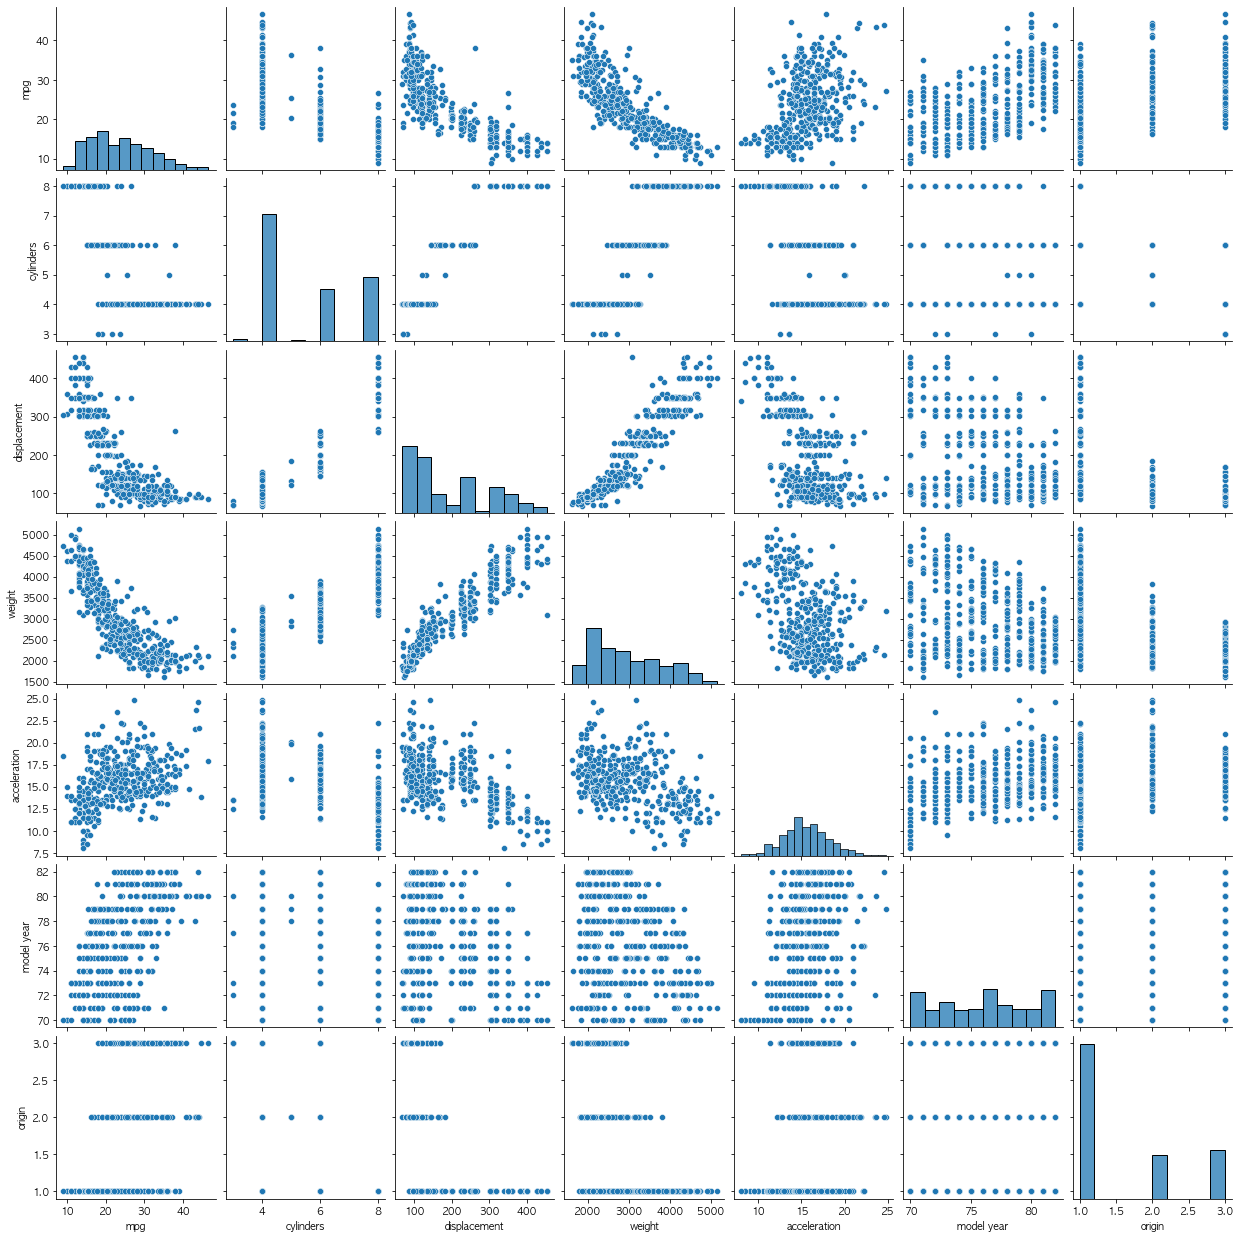

In [56]:
#산점도 그리기
import seaborn as sns

sns.pairplot(mpg)

In [57]:
#전체 열 들의 상관계수 확인
print(mpg.corr())

                mpg  cylinders  displacement  weight  acceleration  \
mpg           1.000     -0.775        -0.804  -0.832         0.420   
cylinders    -0.775      1.000         0.951   0.896        -0.505   
displacement -0.804      0.951         1.000   0.933        -0.544   
weight       -0.832      0.896         0.933   1.000        -0.417   
acceleration  0.420     -0.505        -0.544  -0.417         1.000   
model year    0.579     -0.349        -0.370  -0.307         0.288   
origin        0.563     -0.563        -0.609  -0.581         0.206   

              model year  origin  
mpg                0.579   0.563  
cylinders         -0.349  -0.563  
displacement      -0.370  -0.609  
weight            -0.307  -0.581  
acceleration       0.288   0.206  
model year         1.000   0.181  
origin             0.181   1.000  


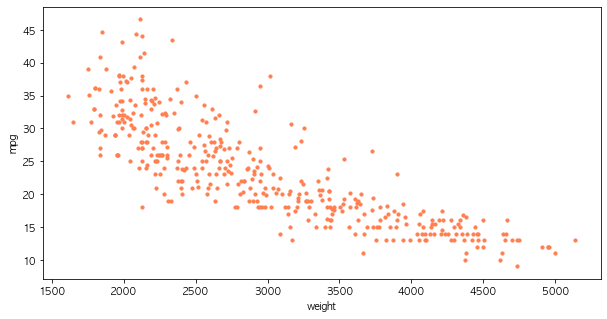

In [58]:
#mpg 와 wwight 그리고 horsepower 와의 상관계수
#weight 와 mpg 컬럼의 산점도 그리기
mpg.plot(kind='scatter', x='weight',y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()

<AxesSubplot:xlabel='weight', ylabel='mpg'>

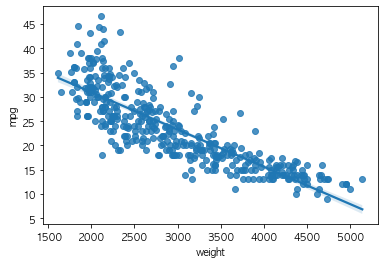

In [59]:
#seaborn 패키지의 regplot()을 이용한 산점도 그리기 
#fit_reg=False 옵션을 이용해서 회귀선을 제거할 수 있음
sns.regplot(x='weight', y='mpg', data=mpg)

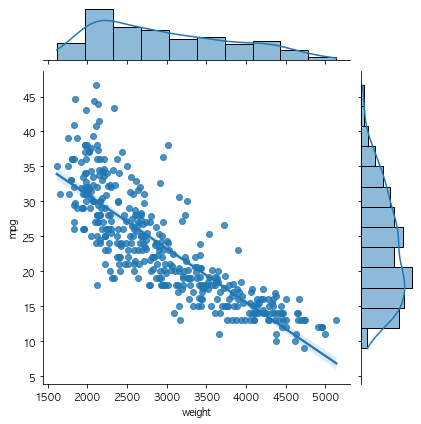

In [60]:
sns.jointplot(x='weight', y='mpg', kind='reg', data=mpg)

In [61]:
#mpg 와 weight 그리고 horsepower 와의 상관계수

print('mpg와 weight의 상관계수:', mpg['mpg'].corr(mpg['weight']))

#print(mpg['mpg'].corr(mpg['horsepower'])) #horsepower는 숫자 컬럼이 아니라서 안됨
mpg['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
mpg.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
mpg['horsepower'] = mpg['horsepower'].astype('float')      # 문자열을 실수형으로 변환

print('mpg와 horsepower의 상관계수:', mpg['mpg'].corr(mpg['horsepower']))

mpg와 weight의 상관계수: -0.8317409332443351
mpg와 horsepower의 상관계수: -0.7784267838977759


In [62]:
import scipy as sp
result = sp.stats.pearsonr(mpg['mpg'].values, mpg['horsepower'].values)
print(result)

(-0.7784267838977761, 7.031989029404151e-81)


### 주식 데이터를 이용한 상관 관계 확인

In [63]:
#데이터 가져오기
sp500_sym = pd.read_csv("./data/sp500_sectors.csv")
sp500_px = pd.read_csv("./data/sp500_data.csv.gz", index_col=0)

#통신사 데이터만 가져오기
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

#특정 기간의 데이터만 추출
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                T    CTL    FTR     VZ  LVLT
2012-07-02  0.422  0.141  0.071  0.554 -0.52
2012-07-03 -0.177  0.066  0.071 -0.026 -0.05
2012-07-05 -0.161 -0.133  0.055 -0.052 -0.18
2012-07-06  0.342  0.133  0.008  0.140 -0.36
2012-07-09  0.137  0.124 -0.024  0.254  0.18
...           ...    ...    ...    ...   ...
2015-06-25  0.049 -1.600 -0.040 -0.188 -0.33
2015-06-26 -0.257  0.040 -0.070  0.030 -0.74
2015-06-29 -0.099 -0.560 -0.060 -0.504 -1.36
2015-06-30 -0.503 -0.420 -0.070 -0.524  0.20
2015-07-01 -0.020  0.080 -0.050  0.356  0.14

[754 rows x 5 columns]


In [64]:
#(sector == 'etf').
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

              XLI    QQQ    SPY    DIA   GLD    VXX   USO    IWM    XLE  \
2012-07-02 -0.376  0.096  0.028 -0.243  0.42 -10.40  0.00  0.535  0.028   
2012-07-03  0.376  0.482  0.875  0.728  0.49  -3.52  0.25  0.926  0.996   
2012-07-05  0.150  0.096 -0.103  0.149  0.24   6.56 -0.07 -0.172 -0.460   
2012-07-06 -0.141 -0.491  0.019 -0.205 -0.52  -8.80 -0.18 -0.229  0.207   
2012-07-09  0.244 -0.048 -0.056 -0.168  0.43  -0.48  0.46 -0.191 -0.235   

              XLY    XLU    XLB    XTL    XLV    XLP    XLF    XLK  
2012-07-02  0.096  0.098 -0.094  0.019 -0.010  0.313  0.019  0.076  
2012-07-03  0.000 -0.045  0.337  0.000  0.000  0.129  0.104  0.236  
2012-07-05  0.306 -0.152  0.103  0.019 -0.143 -0.074 -0.142  0.066  
2012-07-06  0.153  0.080  0.019 -0.429 -0.095  0.120  0.066 -0.227  
2012-07-09 -0.201 -0.036 -0.169  0.000  0.353 -0.065  0.019  0.009  


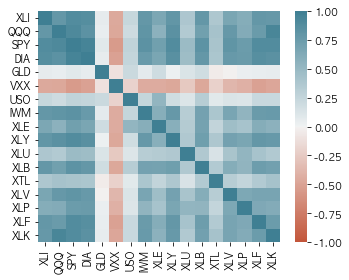

In [65]:
#heatmap을 이용한 수익 간의 상관관계 파악
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

/var/folders/98/j21dd2qs46b69mwc94dgyxnr0000gn/T/ipykernel_19998/1767497109.py:38: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = fig.colorbar(m)


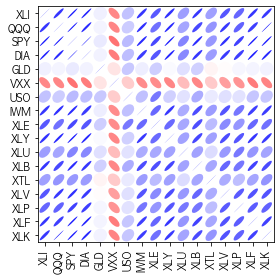

In [66]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

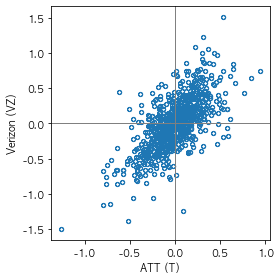

In [67]:
#ATT와 Verizon 과의 상관관계
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

### 앤스콤 데이터

In [68]:
import statsmodels.api as sm
data = sm.datasets.get_rdataset("anscombe")
df = data.data
print(df[["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]])

    x1     y1  x2    y2  x3     y3  x4     y4
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89


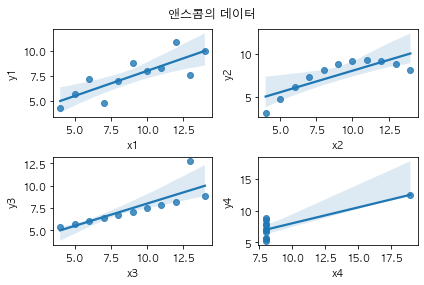

In [69]:
plt.subplot(221)
sns.regplot(x="x1", y="y1", data=df)
plt.subplot(222)
sns.regplot(x="x2", y="y2", data=df)
plt.subplot(223)
sns.regplot(x="x3", y="y3", data=df)
plt.subplot(224)
sns.regplot(x="x4", y="y4", data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("앤스콤의 데이터")
plt.show()

### 스피어만 상관 계수

In [70]:
#스피어만 상관계수
s1 = pd.Series([1,2,3,4,5])
s2 = pd.Series([1,4,9,16,25])
print("피어슨 상관계수:",s1.corr(s2)) 
print("스피어만 상관계수:", s1.corr(s2, method='spearman')) 
print("스피어만 상관계수:", sp.stats.spearmanr(s1, s2)) 

피어슨 상관계수: 0.981104910251593
스피어만 상관계수: 0.9999999999999999
스피어만 상관계수: SpearmanrResult(correlation=0.9999999999999999, pvalue=1.4042654220543672e-24)


### 켄달의 상관 계수

In [71]:
## 켄달의 상관계수 
s1 = pd.Series([1,2,3,4,5])
s2 = pd.Series([1,4,9,16,25])
print("켄달 상관계수:", s1.corr(s2, method='kendall')) 
print("켄달 상관계수:", sp.stats.kendalltau(s1, s2)) 

켄달 상관계수: 0.9999999999999999
켄달 상관계수: KendalltauResult(correlation=0.9999999999999999, pvalue=0.016666666666666666)


### 육각형 그래프 나 등고선 그래프

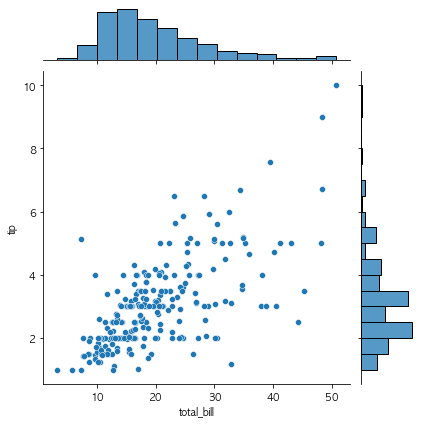

In [72]:
tips = sns.load_dataset("tips")    # 팁 데이터
sns.jointplot(x="total_bill", y="tip", data=tips, kind='scatter')

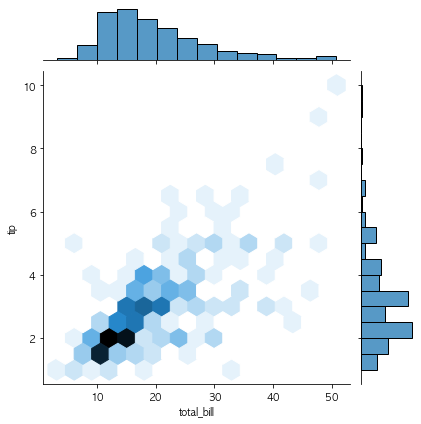

In [73]:
#육각형 그래프
sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

In [74]:
kc_tax = pd.read_csv("./data/kc_tax.csv.gz")
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


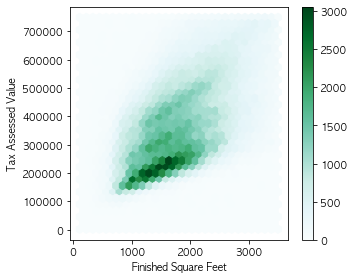

In [75]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

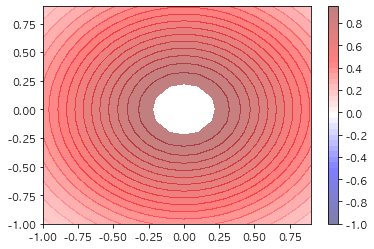

In [76]:
x=np.arange(-1,1,0.1)
y=np.arange(-1,1,0.1)

X,Y=np.meshgrid(x,y)
Z=np.exp(-(X**2+Y**2))

CS=plt.contourf(X,Y,Z,levels=np.arange(-1,1,0.05),alpha=0.5,cmap='seismic')

plt.colorbar()


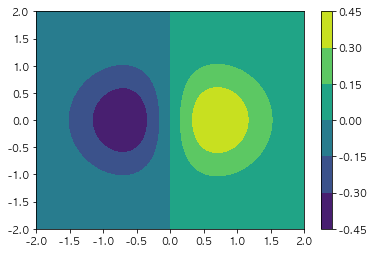

In [77]:
# Vector Field
Y, X = np.mgrid[-2:2:20j, -2:2:20j]
U =(1 - 2*(X**2))*np.exp(-((X**2)+(Y**2)))

# Countour Plot
X, Y = np.mgrid[-2:2:100j, -2:2:100j]
Z = X*np.exp(-(X**2 + Y**2))
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

plt.show()

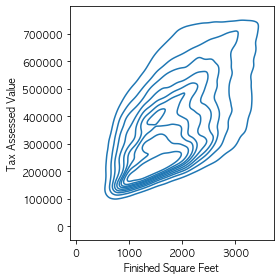

In [78]:
#등고선 차트 - 시간이 오래 걸림
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

### 범주형 데이터 와 범주형 데이터

In [79]:
lc_loans = pd.read_csv('./data/lc_loans.csv')
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [80]:
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off  Current  Fully Paid   Late    All
grade                                                 
A             0.022    0.690       0.282  0.006  0.161
B             0.040    0.709       0.235  0.016  0.294
C             0.050    0.736       0.191  0.023  0.268
D             0.067    0.717       0.184  0.031  0.165
E             0.082    0.708       0.171  0.039  0.077
F             0.118    0.654       0.180  0.047  0.029
G             0.126    0.614       0.198  0.061  0.007


### 범주형 데이터 와 수치형 데이터

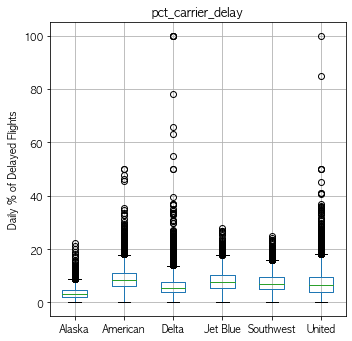

In [81]:
airline_stats = pd.read_csv("./data/airline_stats.csv")
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

### 바이올린 차트

/Users/adam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip'>

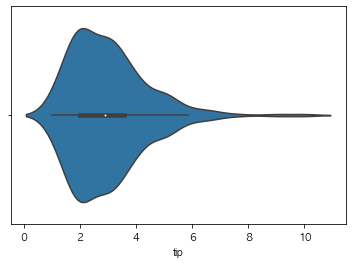

In [82]:
sns.violinplot(tips['tip'])

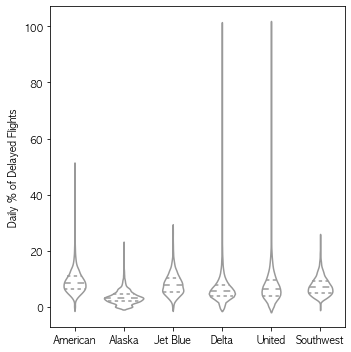

In [83]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

### 조건화

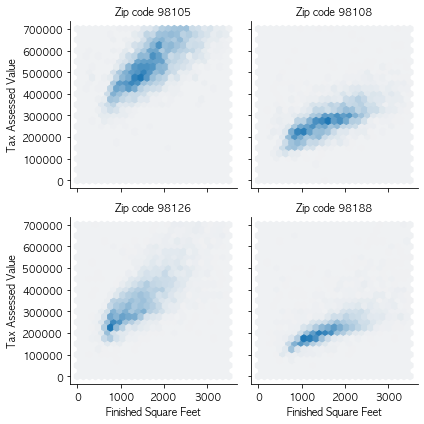

In [84]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()